In [2]:
include("ProyectoFinal.jl")

Energia_3 (generic function with 1 method)

## Sistema Sol - Tierra - Luna

Para el sistema de 3 cuerpos formado por el Sol, la Tierra y la Luna, consideramos una posición inicial colineal, con las distancias equivalentes a las distancias astronómicas reportadas.

Usamos también datos concernientes a las masas.

In [84]:
MasaSol = 1.
#MasaTierra = 0.0003015
#MasaLuna = 0.00000037
MasaTierra = 3.3e-5
MasaLuna = 2.7e-7

Distancia_TierraSol = 1.
Distancia_TierraLuna = 0.002577181
Distancia_LunaSol_inicial= Distancia_TierraSol + Distancia_TierraLuna

VelocidadTraslacional_TierraSol = 1.
VelocidadTraslacional_TierraLuna = 0.1
VelocidadLuna_inicial = VelocidadTraslacional_TierraSol + VelocidadTraslacional_TierraLuna

PosicionInicialSol = [0., 0., 0.]
PosicionInicialTierra = [Distancia_TierraSol, 0., 0.]
PosicionInicialLuna = [Distancia_LunaSol_inicial, 0., 0.]

3-element Array{Float64,1}:
 1.00258
 0.0    
 0.0    

In [85]:
function iniciar(masa, posiciones, velocidades)
    condiciones = [masa, posiciones[1], posiciones[2], posiciones[3], velocidades[1], velocidades[2], velocidades[3]]
    return condiciones
end

iniciar (generic function with 1 method)

In [86]:
#Condiciones Iniciales

#CondicionesSol    = [MasaSol,     0.,                  0.,   0., 0.,                                 0.2, 0. ]
CondicionesSol = iniciar(MasaSol, PosicionInicialSol, [0.,0.,0.,])
CondicionesTierra = iniciar(MasaTierra, PosicionInicialTierra, [0., VelocidadTraslacional_TierraSol, 0.])
CondicionesLuna   = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadLuna_inicial, 0.])

#Agrupamos Todo

CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]

3-element Array{Array{Float64,1},1}:
 [1.0,0.0,0.0,0.0,0.0,0.0,0.0]           
 [3.3e-5,1.0,0.0,0.0,0.0,1.0,0.0]        
 [2.7e-7,1.002577181,0.0,0.0,0.0,1.1,0.0]

In [87]:
t, Sol, Tierra, Luna = Integrador3(CondicionesIniciales, 5000.);

In [115]:
function trayectoria(Cuerpo1, Cuerpo2, Cuerpo3, nombre="algo.png")
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]
    
    plot(Px1, Py1, ",", marker=".", markersize=0.3, color = "red", label="Sol")
    plot(Px2, Py2, ",",  marker=".", markersize=0.3, color = "blue", label="Tierra")
    plot(Px3, Py3, ",",  marker=".", markersize=0.3, color = "purple", label="Luna")
    show()
    legend()   
    savefig(nombre)
    
end

trayectoria (generic function with 2 methods)

In [137]:
using Colors
par = [3.0:-0.2:0.0]
paleta = colormap("Oranges", length(par))

SOL    = []
LUNA   = []
TIERRA = []

for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, s, t, l = Integrador3(CondicionesIniciales, 100.)
    
    trayectoria(s,t,l, "imagen_$i.png")
    
    
end
    
    


In [136]:
length(SOL)

0

In [119]:
trayectoria(Sol,Tierra,Luna)
for i in 1:length(par)
    trayectoria(SOL[i], TIERRA[i], LUNA[i], "cocono_%i"%i )
end

LoadError: LoadError: BoundsError: attempt to access 0-element Array{Float64,1}
  at index [1]
while loading In[119], in expression starting on line 2

![una imagen](http://localhost:8888/files/algo.png "Titulo")

In [213]:
PosicionSol = Sol[1]
VelocidadSol = Sol[2]

PosicionTierra = Tierra[1]
VelocidadTierra = Tierra[2]

PosicionLuna = Luna[1]
VelocidadLuna = Luna[2];

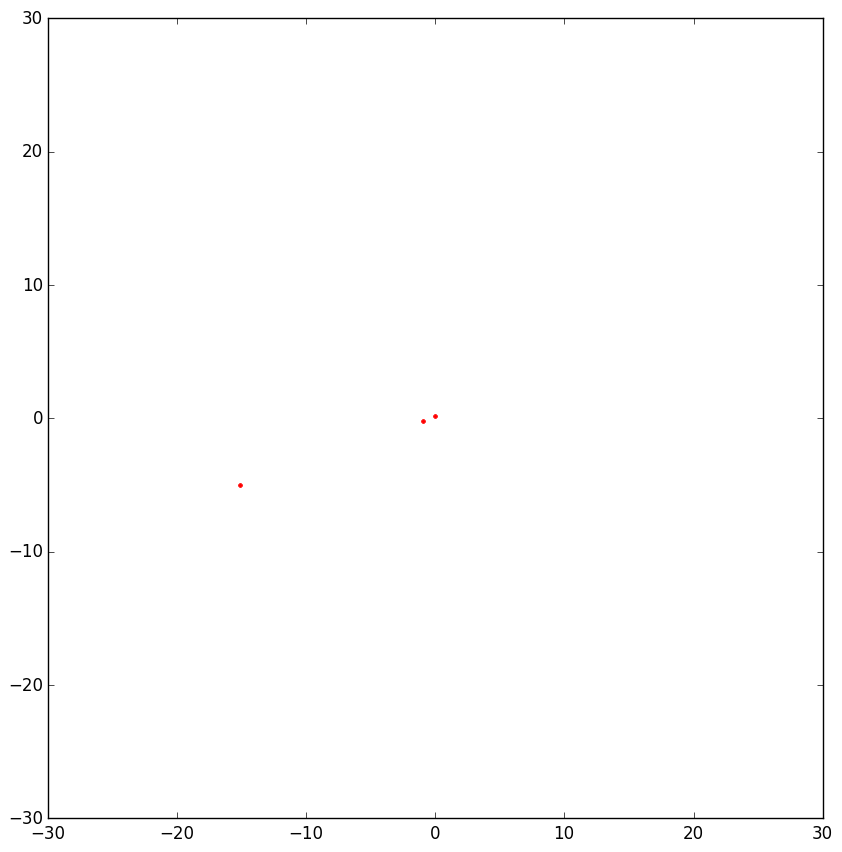

In [214]:
anima3C(Sol, Tierra, Luna, "Sistema2",100)

In [215]:
muestra_animacion("Sistema2")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAPcVtZGF0AAACnwYF//+b3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTQgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj01IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAARF2WIhAAU//73x0/Apuj5ZsudRT0hMIrY+kgovVjs0DJ1AAADAAADAAADAAADAVwNHk1PSmckNCQAAAMAALmAB2gA4AArXh/41PP/gAT8TEWjf234viSOPrGQpAeSLYFtdowCzCLkCG+iV+LrMPN7vSjw7EpUTRQz820WqXRu/qcQnQx5Oav3+mP3yjri9YX+0xmpliAVvwy7oAEsKO2feE3d/VoVCGZ5hpbhCu76HyMFyKwCG/NWpr6YVqQ3Esd1wvXlomUPe6cp58fWpM0LvJikuMhT1QUy2wmy1hlZEXdqD3IGzVTu6bbLLb4y9MGJfngHedC1SGcvt2gbXfCT/6IuOEnscIuyQMVI7stgTHmkvjpcHXKjEux6KvFfs9ovLrMFzJB3NL8j2burRnu9DX/WaL5i0ZXsL78TnJuinzK9/UZ0xLNIsWXEa8sH+LZCWefzdnl3pBeEsyf+5el/8J56v6cOdGmohG80+YsyJ9fH08NlewBVOmXh93QkRT9/9XUkmHXBfJLL4rZ2rLXTzEI1iy7zSbWYR17YU8OXnEBw5UVQP//9qDnLrkZKc27p9PP2WtQscwb2sRCmnVhVKdMmrnwXWW1BOYXC+t6Pyeh2dS8jMpWrP8u08xafWrHay4O6wKbk+d7yTVaEMA0jf5IRHOHh5aQaY53VbGZECWiXq62Uvx8RWznyUXyiHbXWCJu/XRu73BTmlEMJhEfUjm0BPoJlElfu+z51OjKeXCikwPnuCvN8yuhvKePr6wc4SPrRrGvQw3e6AhoHWK9g0TBPU2LszAAABR+4cACn1rAAc4wAAMkOkAMHAgAJIgTPL+R6Q+/AAaVevvLlPnJ2tywvK/D00slbd8Mxf6wI7zIgXx/yeqnJE2FZnzooGP2UvjHhgbS9cu/xX7V6sLYQr35ds+Hnvb2BnbLSsI6H1/bpVVZeAp3Z0pXe53UJeFK9gGkztE9wQfOhLp//8bHkgLRgZLfEBcdw1SRr2lAyMnchwkqXbrNqh8/wbxuYvDKbbkY6/Itnv44ldL+MnFmnr8otnbuWQTEpZGR7t8c/lmVV7QUQCngZxcsqLXQUHfQLq0pGYWa/ln5v2NuUakRUOQLLgn57IpO+6mzrYKHY8HhD4+Ie6TLgQ/xbO8k+x3kQABIOpQu4LNd1Otmgs8q9Q4Bhm0cbxhKFJfMxMcB0fbKsCY0AAAMAAFzAAAADAAADAAADAAADAAADAAP5W5pcV52im6JfVm2SXMzSKyqOS2e34Ybcl2lcGAWtsS5d5IqO9RbNOFZ2pZein/qKBtsa4B0jo5H5G1P1RT0huKnqv8m/bjKXK+iUOI56AixRSWz1xmiAdmWJq8bvXpgrwNM6pw5xA5fOj9APTFA2TMJUKAREhya3dSDGMVtWBIh8eMYIW8InNPzncIgNTS8hWZMnDaYMDxdfOWs18N/pJsfCUM3IIaHsIALRljpsTLnrfEO/BKN3o7y4LawinMvtTTnnLSxkUSLW1ld767ABh3p1QLNnjvMTS5wXZC8yAspAOe9u0sERyFcGbrudZzgIykFRaaCDaUHx2K4VmMGdKOX/X0DQCvi/uR+RgB5D/bpPvAPWbFfpbzZUuAAO3cb7q1GyYhA/LIAAAAMAAAMAAAMAAAMAAAMAAAe0iblMjUV5phVGnW9eBDk/uLAfSaepeEw3NE17cpOMq0rFrPP2wJWDSse6hZKS31QoOasAetzWTAuanFyxTfpJ51UWszNyke7elyJ6b7++FKJBkBfRRF5ZFPw8o3eLfxIs/2cO62xo+/e0HOPHsBMosB5YD4w7jD9XULRwM1OvuOIbTXQlYF0GdukGxgHqtT9hCl2wxdGf1W9zgLB1bKGLXrZr1JT0fdHDVvR4DXoNG4q05Tc100O1HYsurYUxSuQgkMi79pfp4ZswWa72GERZTQ/2fE1VkcW4V/zkspcd7HORjAKhiepCEAgyxEjR3g8lP2GR65ui/3gu3ajMV6TMlmv+PMYxZJYY13pKK1fvtTTm+Nlqz0xjj/2DhvEJSPTeJSYxyELYbTDgq66grWDN9TZcJiChJHcvvqCaL4hrRAGkwAAAAwAAAwAAAwAAAwAAAwAABuUY5kvvRtvvSr2OUCnO/s3fOd//x+RDynVV8owc0PzoPxyjhHkNNmpvVj81Rl0D0155hKvTSCt9olcQHSBrLHavRJRAHn/8B8QU5IUTdabPeMQ6S8s0PeWngwqoKUs2UYBWLwjkZolrlnJs5z/gIQ0zZ9DmYGOOh9FW32bNVF2ZRi+38gOVbnWprRBb/fLZduIxN4sKCIFcqoVXaf7piQ7I57/+CM7gbYdhy4Ff9FbSMUi58ROoMFU+kLX3H4fTB5/SOnz6Wdg9NFZBkyURybyyxLITUjw5DcKTGgYnJVMaj8mgGeO6tNoDBwNHQZlodJlpp/IBuxK1laSBzYMt3LLq/joUidHvCiRK+Mw9PbooIFIu22a+0NcyH2gVZ0AAWu/+RU7YAUvV7HqIgCSz262MwA+6CwsLgBLaSsmIADElItYaAVEAM82MTQuTH3ab76E7t//6cesziKAxWxDoQsFkJiC1HrWA/H+KXFUNY4+b59Vmi+xZ2PfEqsbgKnJUxGvrtoIBnOp707jE6X7se6yqq+TZoN2OPPtASq4CEgfhdr2t3I9pzlhuLB2Sp8BfLLU1F5pKYR8rolAXBUAe4zjx2/VGTwy0j5o9EsZJx2vQFsh3md0cOAq6v4P7FV3LNOA5LEtDXtQFkHvz26uGxX9bpkG6KBtLnq2ihNkjGgYx7feupzE6T2+OyjAWlskyITpJ8x1lTvJU0WmTdxPDP0k8D6iO9k1Kr1H1dIV8HP1VM70fY+cnkJ3ENw2terC/vCDDpBnO+5C1O3UnNmSBGma9K+ZKhqvtkArbRs27NKS54ag6PEnVpEualOVsLXldT5opqFdTr8vwrSRQg90QBH1GF/71AVnv9+7LkcU+mKCCAHxhOk4IHMOOzQ2